Tema:  
Diseñar, implementar y evaluar un sistema inteligente basado en modelos de aprendizaje automático supervisado y análisis de series de tiempo, capaz de predecir descompensaciones clínicas en pacientes con enfermedades crónicas (diabetes tipo 2, hipertensión arterial, o la combinación de ambas), utilizando datos históricos de monitoreo fisiológico. El sistema buscará generar soluciones tempranas diferenciadas según el tipo de patología, con el fin de integrarse en una futura plataforma de monitoreo clínico.

Descripción Dataset:
Link Dataset Original:https://www.kaggle.com/code/danishmubashar/diabetes-hypertension-predict-acc-97/input

El archivo diabetes_prediction_dataset.csv contiene datos médicos y demográficos de los pacientes junto con su estado de diabetes, ya sea positivo o negativo. Consta de varias características, como edad, sexo, índice de masa corporal (IMC), hipertensión, enfermedad cardíaca, historial de tabaquismo, nivel de HbA1c y nivel de glucosa en sangre. El conjunto de datos se puede utilizar para construir modelos de aprendizaje automático que puedan predecir la probabilidad de diabetes en pacientes en función de su historial médico y detalles demográficos.

Se utilizó una técnica de imputación sintética guiada por reglas médico-realistas, basada en el comportamiento clínico esperado de pacientes con enfermedades crónicas. A partir de diagnósticos previos, se generaron valores progresivos para glucosa, HbA1c, presión arterial y BMI, simulando visitas clínicas sucesivas. Para reflejar la variabilidad fisiológica individual, se incorporó variación aleatoria controlada mediante funciones como np.random.uniform(), manteniendo coherencia con rangos clínicamente válidos. Esta estrategia permite completar secuencias temporales de manera realista, facilitando el análisis de series de tiempo y el entrenamiento de modelos que capturen la evolución clínica de los pacientes.
 -> dataset_timeseries_realista.csv



Objetivos del EDA:

1. Explorar y comprender las características de los datos históricos de monitoreo fisiológico en pacientes con enfermedades crónicas (diabetes tipo 2, hipertensión arterial, o ambas), con el fin de identificar patrones relevantes, relaciones entre variables y posibles descompensaciones clínicas, que sirvan como base para el desarrollo del sistema predictivo.
2.	Evaluar la calidad y completitud de los datos disponibles, identificando valores faltantes, duplicados, inconsistencias o errores en las variables fisiológicas a usar.
3.	Describir estadísticamente las variables fisiológicas monitoreadas como IMC/ BMI (índice de masa corporal, HBA1(hemoglobina), nivel de glucosa, presión sistólica, presión diastólica y edad, entre las más relevantes; considerando su distribución, tendencia central y dispersión por grupo de pacientes (diabetes, hipertensión o ambas).
4.	Explorar relaciones entre variables fisiológicas y eventos de descompensación clínica, con el fin de detectar correlaciones, asociaciones o patrones temporales relevantes.
5.	Analizar el comportamiento temporal de las variables fisiológicas, aplicando técnicas de análisis de series de tiempo para identificar tendencias, estacionalidades y anomalías que puedan preceder a una descompensación.
6.	Detectar y visualizar patrones de alerta temprana antes de descompensaciones clínicas, mediante visualizaciones interactivas y análisis descriptivo.




In [2]:
#Importacion de Librerias------------------------------------------------------------------------------------
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.stats import shapiro, kstest, pearsonr, spearmanr, mode

In [3]:
#--------------------------------------Sección 1: Carga y Exploración Inicial ------------------------------------------------
# 1. Carga del dataset transformado
file_path = "dataset_timeseries_realista.csv"
df = pd.read_csv(file_path)

# 2. Visualización de las primeras y últimas filas
print("🔹 Primeras filas del dataset transformado:")
print(df.head())
print("\n🔹 Últimas filas del dataset transformado:")
print(df.tail())

# 3. Información general del dataset
print("\n🔹 Información general del dataset:")
buffer = io.StringIO()
df.info(buf=buffer)
print(buffer.getvalue())

print("Shape (filas, columnas):", df.shape)
print("\nTipos de datos por columna:\n", df.dtypes)

# 4. Identificación de valores faltantes
print("\n🔹 Valores faltantes por columna:")
print(df.isnull().sum())

# 5. Resumen estadístico básico
print("\n🔹 Resumen estadístico del dataset:")
print(df.describe())

🔹 Primeras filas del dataset transformado:
   patient_id  visit   age  gender smoking_history  diabetes  hypertension  \
0           0      1  80.0  Female           never         0             0   
1           0      2  80.0  Female           never         0             0   
2           0      3  80.0  Female           never         0             0   
3           1      1  54.0  Female         No Info         0             0   
4           1      2  54.0  Female         No Info         0             0   

   blood_glucose_level  HbA1c_level  systolic_bp  diastolic_bp    bmi  
0                  136         6.69          124            76  25.54  
1                  137         6.78          123            76  25.79  
2                  139         6.74          122            75  26.24  
3                   83         6.65          122            78  27.53  
4                   87         6.74          122            77  27.85  

🔹 Últimas filas del dataset transformado:
        patie

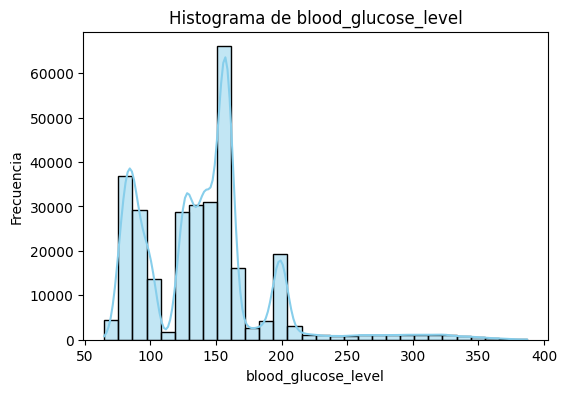

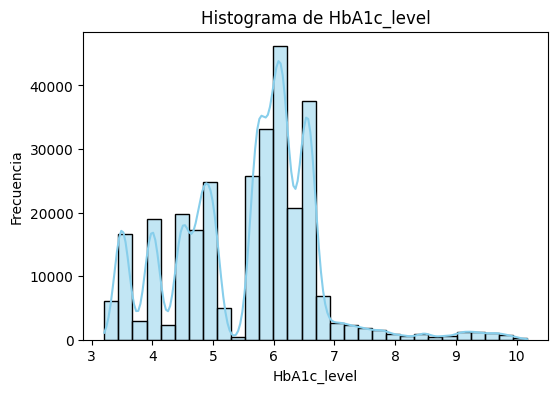

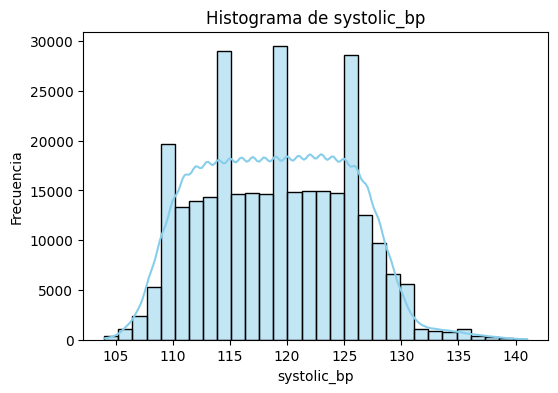

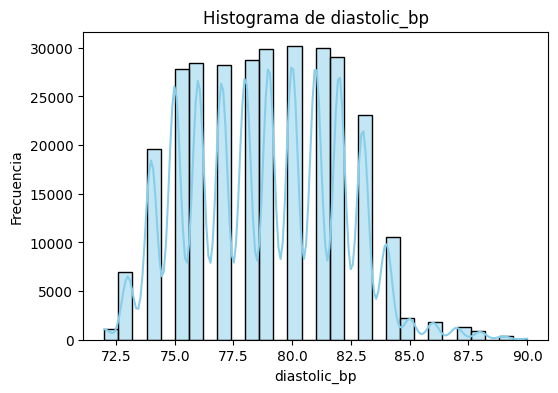

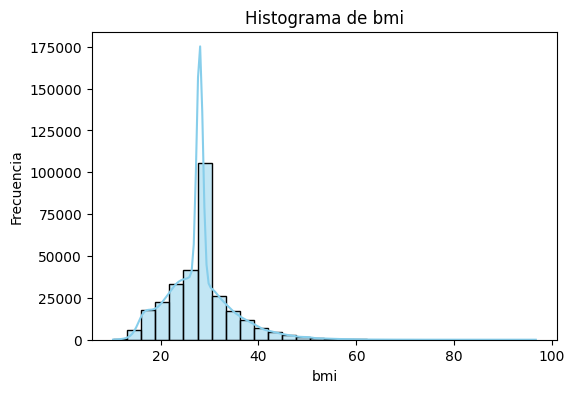

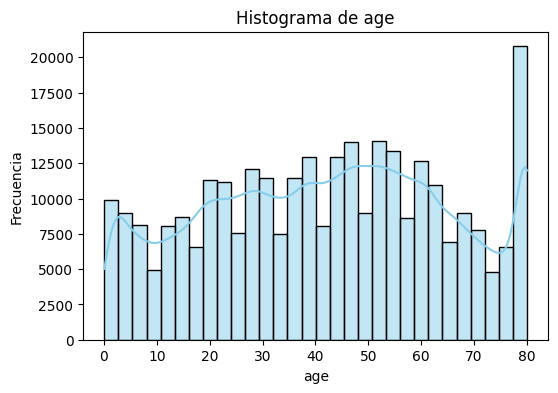

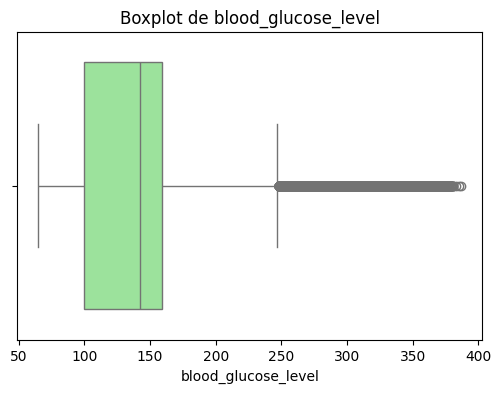

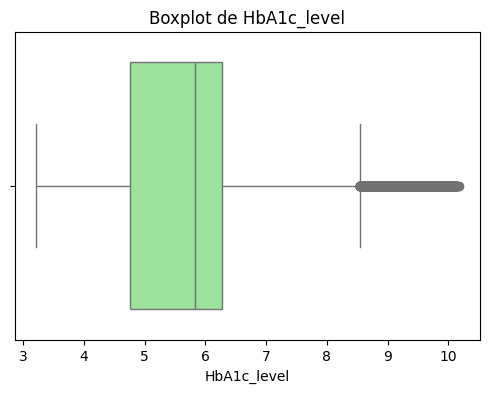

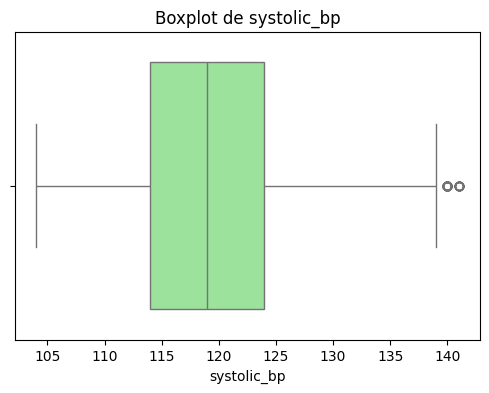

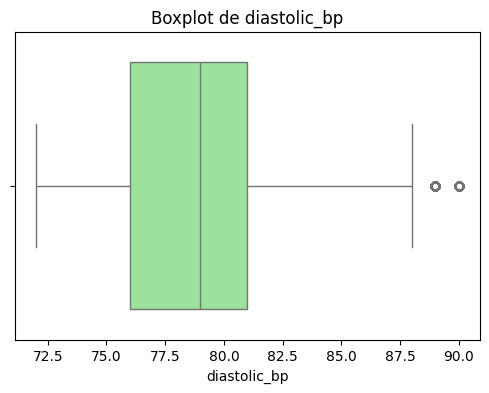

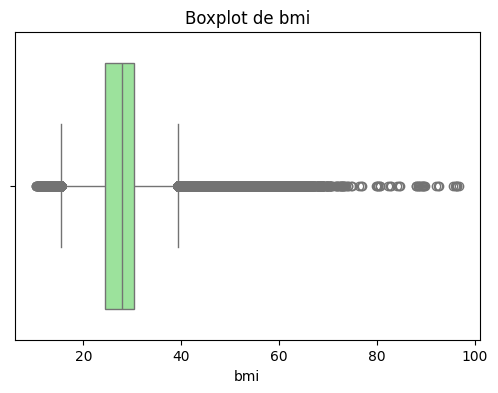

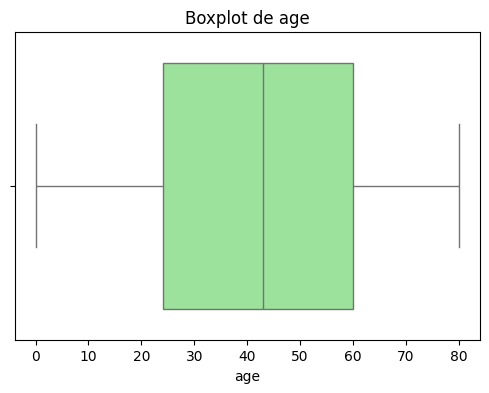

📊 Estadísticas descriptivas de variables numéricas:
                        count        mean        std     min     25%     50%  \
blood_glucose_level  300000.0  140.466530  46.957783   65.00  100.00  142.00   
HbA1c_level          300000.0    5.578570   1.153016    3.21    4.75    5.83   
systolic_bp          300000.0  118.981843   6.302865  104.00  114.00  119.00   
diastolic_bp         300000.0   78.806253   3.181454   72.00   76.00   79.00   
bmi                  300000.0   28.020308   6.643542   10.30   24.32   27.89   
age                  300000.0   41.885856  22.516765    0.08   24.00   43.00   

                        75%     max  
blood_glucose_level  159.00  387.00  
HbA1c_level            6.27   10.17  
systolic_bp          124.00  141.00  
diastolic_bp          81.00   90.00  
bmi                   30.28   96.66  
age                   60.00   80.00  

🔎 Outliers en blood_glucose_level: 9901 casos detectados

🔎 Outliers en HbA1c_level: 5483 casos detectados

🔎 Outliers e

C:\Users\User\AppData\Local\Temp\ipykernel_24156\2362987880.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


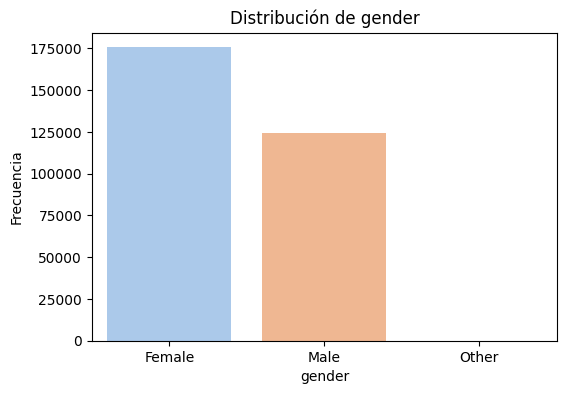

C:\Users\User\AppData\Local\Temp\ipykernel_24156\2362987880.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


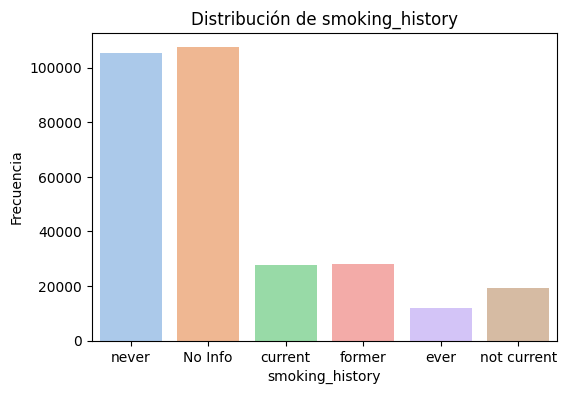

C:\Users\User\AppData\Local\Temp\ipykernel_24156\2362987880.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


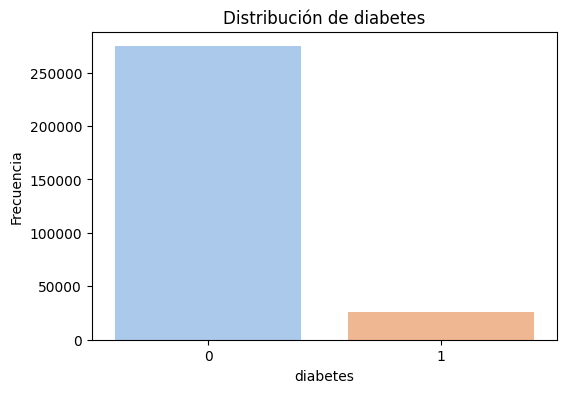

C:\Users\User\AppData\Local\Temp\ipykernel_24156\2362987880.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


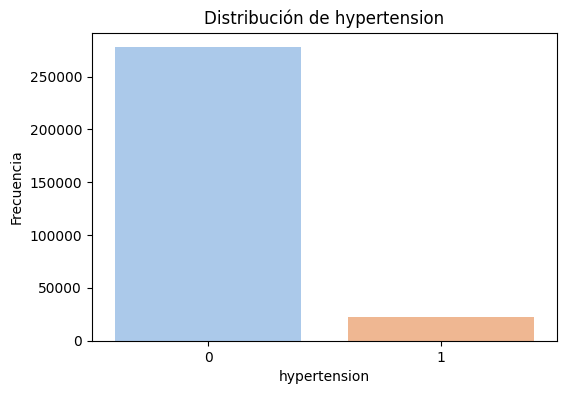


📊 Tablas de frecuencia de variables categóricas:

Frecuencia de gender:
gender
Female    175656
Male      124290
Other         54
Name: count, dtype: int64

Frecuencia de smoking_history:
smoking_history
No Info        107448
never          105285
former          28056
current         27858
not current     19341
ever            12012
Name: count, dtype: int64

Frecuencia de diabetes:
diabetes
0    274500
1     25500
Name: count, dtype: int64

Frecuencia de hypertension:
hypertension
0    277545
1     22455
Name: count, dtype: int64

📊 Proporciones de variables categóricas:

Proporciones de gender:
gender
Female    58.552
Male      41.430
Other      0.018
Name: proportion, dtype: float64

Proporciones de smoking_history:
smoking_history
No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: proportion, dtype: float64

Proporciones de diabetes:
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64

In [4]:
#---------------------------------------Sección 2: Análisis Univariado--------------------------------------------------------------

# Seleccionar variables numéricas
num_cols = ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi", "age"]

# Histogramas
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Box plots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()

# Estadísticas de distribución
print("📊 Estadísticas descriptivas de variables numéricas:")
print(df[num_cols].describe().T)

# Identificación de outliers usando regla IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"\n🔎 Outliers en {col}: {len(outliers)} casos detectados")

# =========================
# VARIABLES CATEGÓRICAS
# =========================

# Seleccionar variables categóricas
cat_cols = ["gender", "smoking_history", "diabetes", "hypertension"]

# Gráficos de barras
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="pastel")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Tablas de frecuencia
print("\n📊 Tablas de frecuencia de variables categóricas:")
for col in cat_cols:
    print(f"\nFrecuencia de {col}:")
    print(df[col].value_counts())

# Proporciones (%)
print("\n📊 Proporciones de variables categóricas:")
for col in cat_cols:
    print(f"\nProporciones de {col}:")
    print(df[col].value_counts(normalize=True) * 100)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


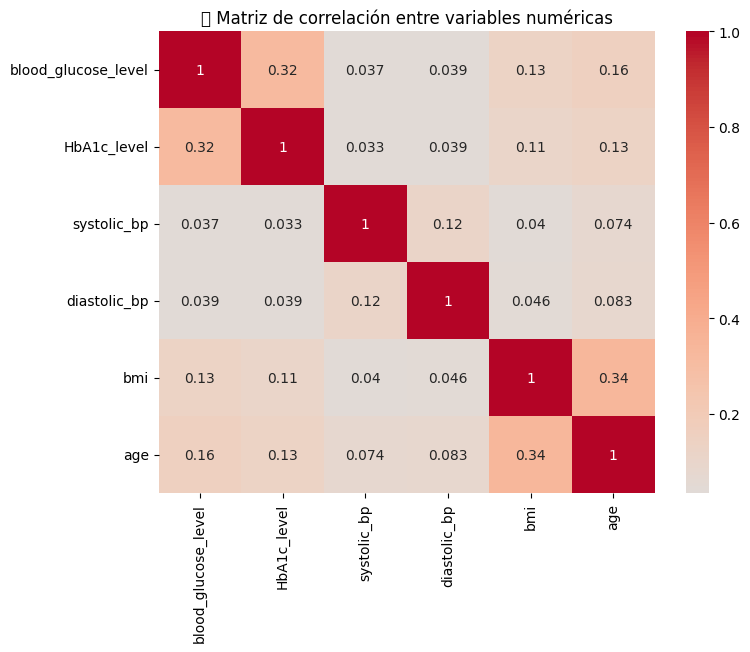

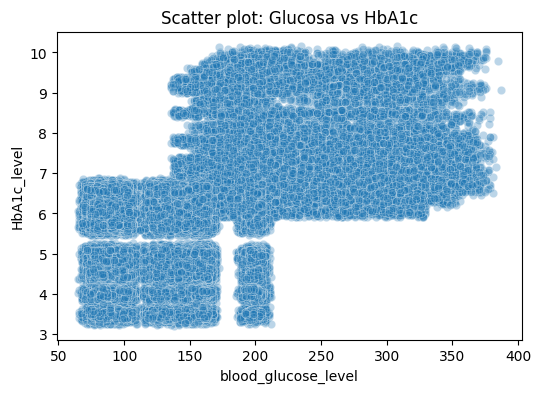

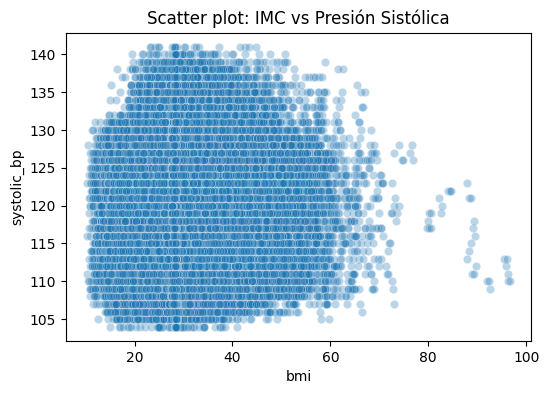

C:\Users\User\AppData\Local\Temp\ipykernel_14680\1459795344.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="diabetes", y="blood_glucose_level", palette="Set2")


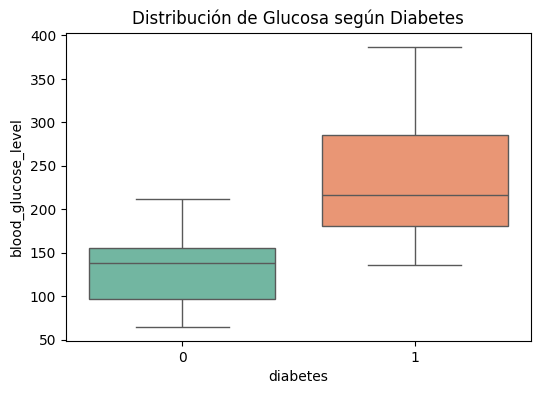

C:\Users\User\AppData\Local\Temp\ipykernel_14680\1459795344.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="hypertension", y="systolic_bp", palette="Set3")


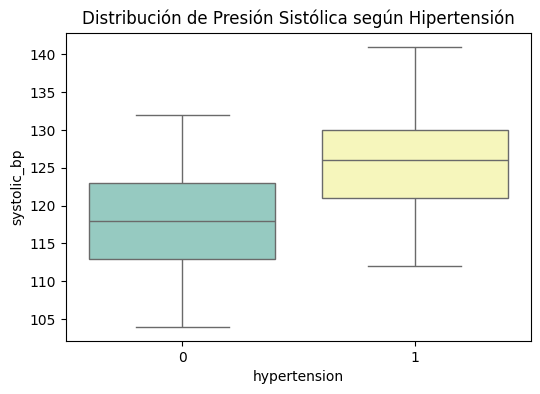

📊 Correlación de variables numéricas con Diabetes:
diabetes               1.000000
blood_glucose_level    0.602019
HbA1c_level            0.517313
age                    0.258008
bmi                    0.214102
diastolic_bp           0.064013
systolic_bp            0.058241
Name: diabetes, dtype: float64

📊 Correlación de variables numéricas con Hipertensión:
hypertension           1.000000
diastolic_bp           0.331856
systolic_bp            0.294482
age                    0.251171
bmi                    0.147532
blood_glucose_level    0.120734
HbA1c_level            0.103938
Name: hypertension, dtype: float64

⚠️ La columna 'target' no existe en este dataset. Verifica si ya la generaste.


In [ ]:
#-------------------------------------------------3. Análisis Bivariado---------------------------------------------------------------------

# =========================
# MATRIZ DE CORRELACIÓN
# =========================
# Seleccionar solo variables numéricas
num_cols = ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi", "age"]

# Calcular correlaciones
corr = df[num_cols].corr()

# Heatmap de correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("🔗 Matriz de correlación entre variables numéricas")
plt.show()

# =========================
# SCATTER PLOTS (NUMÉRICO VS NUMÉRICO)
# =========================
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="blood_glucose_level", y="HbA1c_level", alpha=0.3)
plt.title("Scatter plot: Glucosa vs HbA1c")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="bmi", y="systolic_bp", alpha=0.3)
plt.title("Scatter plot: IMC vs Presión Sistólica")
plt.show()

# =========================
# BOX PLOTS (CATEGÓRICA VS NUMÉRICA)
# =========================
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="diabetes", y="blood_glucose_level", palette="Set2")
plt.title("Distribución de Glucosa según Diabetes")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="hypertension", y="systolic_bp", palette="Set3")
plt.title("Distribución de Presión Sistólica según Hipertensión")
plt.show()

# =========================
# CORRELACIÓN CON VARIABLES OBJETIVO
# =========================

# Diabetes (binaria)
corr_with_diabetes = df[num_cols + ["diabetes"]].corr()["diabetes"].sort_values(ascending=False)
print("📊 Correlación de variables numéricas con Diabetes:")
print(corr_with_diabetes)

# Hipertensión (binaria)
corr_with_htn = df[num_cols + ["hypertension"]].corr()["hypertension"].sort_values(ascending=False)
print("\n📊 Correlación de variables numéricas con Hipertensión:")
print(corr_with_htn)



📊 Promedios de variables por grupo:
                       blood_glucose_level  HbA1c_level  systolic_bp  \
diabetes hypertension                                                  
0        0                      131.822364     5.396630   118.454614   
         1                      132.296461     5.399056   125.496325   
1        0                      233.276773     7.529906   118.444323   
         1                      233.035121     7.552931   125.535441   

                             bmi  
diabetes hypertension             
0        0             27.389547  
         1             30.733389  
1        0             32.467960  
         1             33.360133  


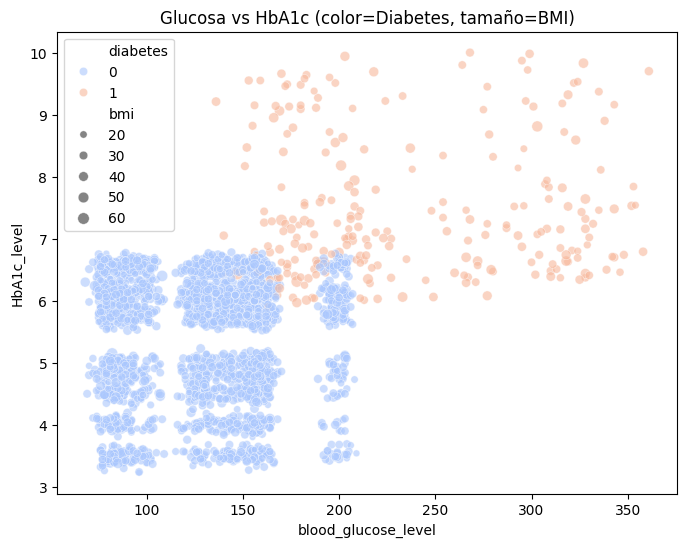

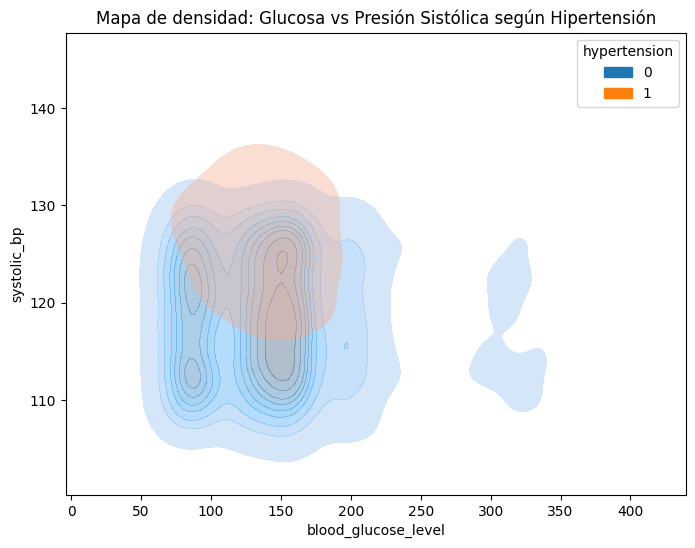

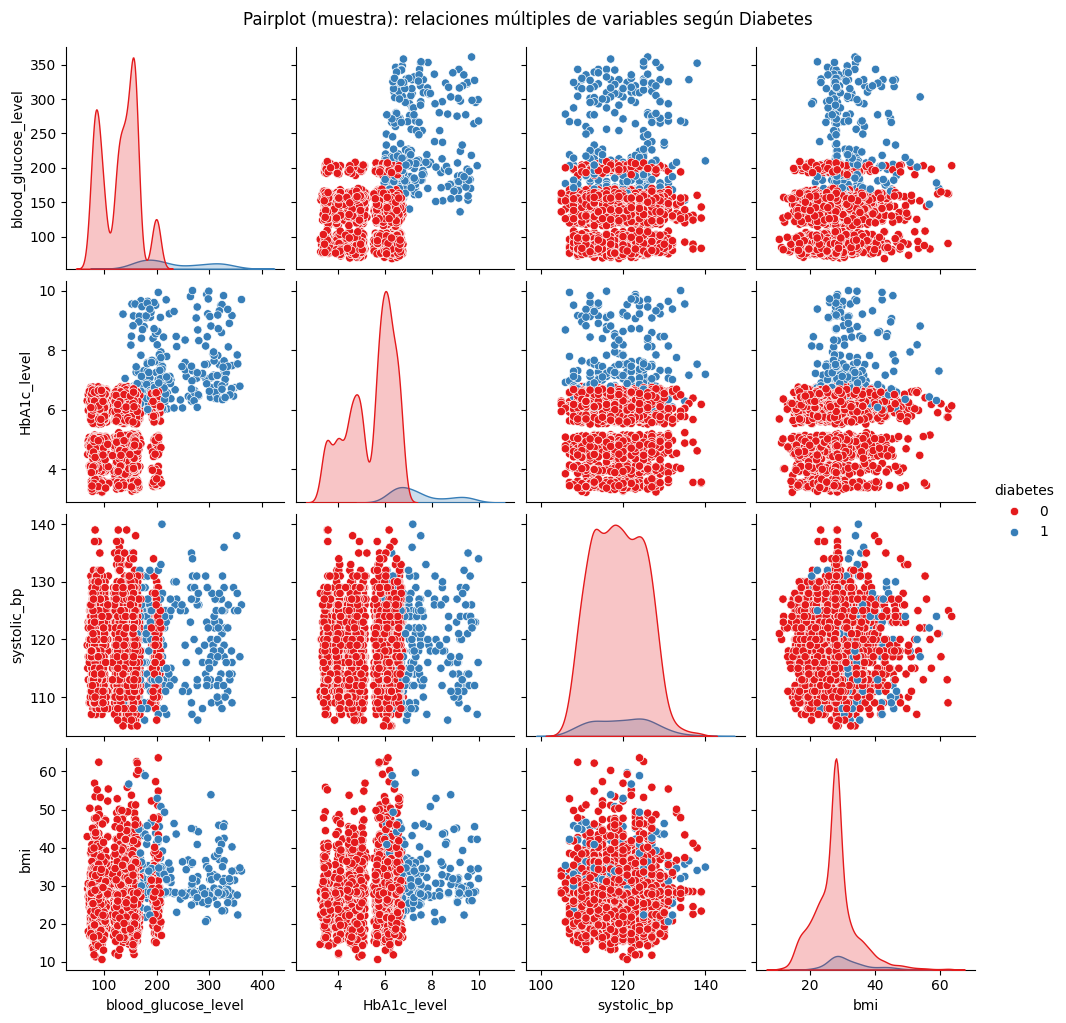

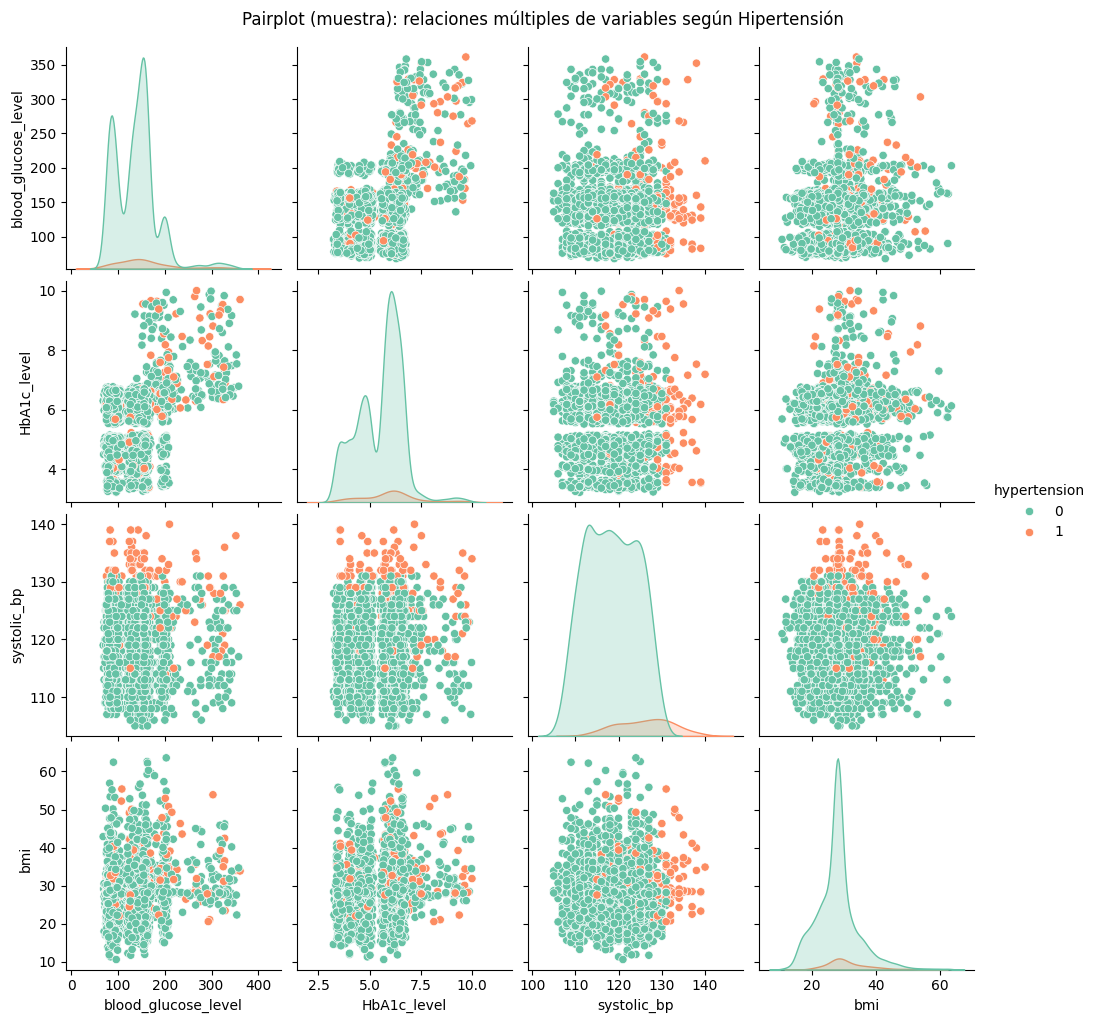

In [8]:
#------------------------------------------------4. Análisis Multivariado------------------------------------------------------------

# =========================
# ANÁLISIS POR GRUPOS/SEGMENTOS
# =========================
group_means = df.groupby(["diabetes", "hypertension"])[
    ["blood_glucose_level", "HbA1c_level", "systolic_bp", "bmi"]
].mean()

print("📊 Promedios de variables por grupo:")
print(group_means)

# =========================
# VISUALIZACIÓN 2D CON 3+ VARIABLES
# =========================
# Usar una muestra representativa
df_sample = df.sample(3000, random_state=42)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_sample,
    x="blood_glucose_level", 
    y="HbA1c_level",
    hue="diabetes",          # color según diabetes
    size="bmi",              # tamaño según IMC
    alpha=0.6,
    palette="coolwarm"
)
plt.title("Glucosa vs HbA1c (color=Diabetes, tamaño=BMI)")
plt.show()

# =========================
# PATRONES COMPLEJOS CON DENSIDAD
# =========================
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df_sample,
    x="blood_glucose_level", 
    y="systolic_bp",
    hue="hypertension", 
    fill=True, alpha=0.4
)
plt.title("Mapa de densidad: Glucosa vs Presión Sistólica según Hipertensión")
plt.show()

# =========================
# RELACIONES MÚLTIPLES (PAIRPLOT SEGÚN DIABETES)
# =========================
subset_diabetes = df_sample[["blood_glucose_level", "HbA1c_level", "systolic_bp", "bmi", "diabetes"]]

sns.pairplot(subset_diabetes, hue="diabetes", diag_kind="kde", palette="Set1")
plt.suptitle("Pairplot (muestra): relaciones múltiples de variables según Diabetes", y=1.02)
plt.show()

# =========================
# RELACIONES MÚLTIPLES (PAIRPLOT SEGÚN HIPERTENSIÓN)
# =========================
subset_htn = df_sample[["blood_glucose_level", "HbA1c_level", "systolic_bp", "bmi", "hypertension"]]

sns.pairplot(subset_htn, hue="hypertension", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot (muestra): relaciones múltiples de variables según Hipertensión", y=1.02)
plt.show()



🔹 Outliers detectados en Glucosa: 9901


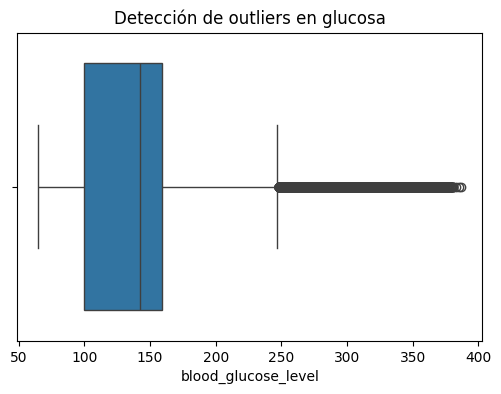

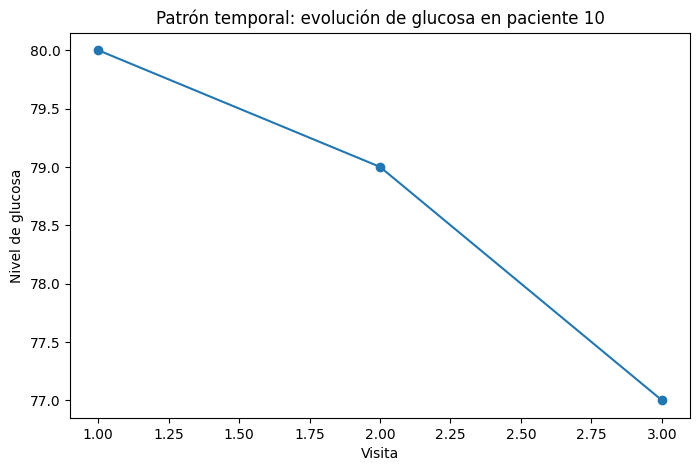

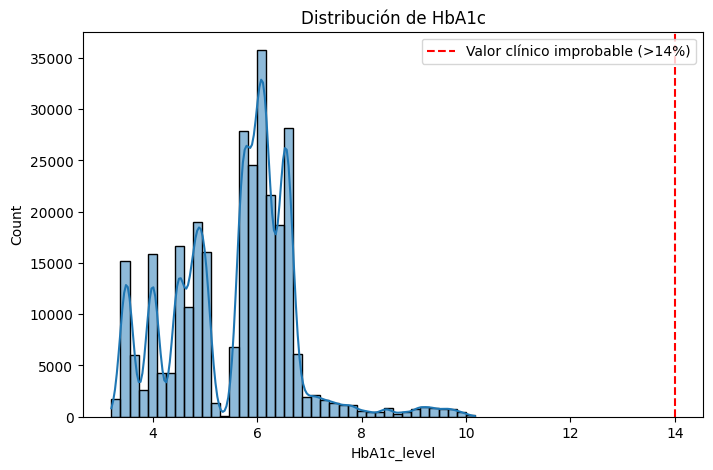

⚠️ Registros con HbA1c fuera de rango clínico: 0
⚠️ Registros con presión sistólica fuera de rango clínico: 0


In [7]:
#----------------------------------------------------5 Detección de Anomalías --------------------------------------
# =========================
# DETECCIÓN DE OUTLIERS ESTADÍSTICOS
# =========================
# Usando regla IQR (Interquartile Range)
def detectar_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

outliers_glucosa = detectar_outliers("blood_glucose_level")
print(f"🔹 Outliers detectados en Glucosa: {len(outliers_glucosa)}")

# Visualización con boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["blood_glucose_level"])
plt.title("Detección de outliers en glucosa")
plt.show()

# =========================
# PATRONES TEMPORALES (SERIES DE TIEMPO)
# =========================
# Ejemplo: evolución de glucosa en un paciente
ejemplo_paciente = df[df["patient_id"] == 10]  # paciente arbitrario
plt.figure(figsize=(8,5))
plt.plot(ejemplo_paciente["visit"], ejemplo_paciente["blood_glucose_level"], marker="o")
plt.title("Patrón temporal: evolución de glucosa en paciente 10")
plt.xlabel("Visita")
plt.ylabel("Nivel de glucosa")
plt.show()

# =========================
# DISTRIBUCIONES ANÓMALAS
# =========================
plt.figure(figsize=(8,5))
sns.histplot(df["HbA1c_level"], bins=40, kde=True)
plt.title("Distribución de HbA1c")
plt.axvline(14, color="red", linestyle="--", label="Valor clínico improbable (>14%)")
plt.legend()
plt.show()

# =========================
# INCONSISTENCIAS EN LOS DATOS
# =========================
# Ejemplo: HbA1c muy baja (<3) o muy alta (>15), valores clínicamente imposibles
inconsistencias = df[(df["HbA1c_level"] < 3) | (df["HbA1c_level"] > 15)]
print("⚠️ Registros con HbA1c fuera de rango clínico:", len(inconsistencias))

# Ejemplo: pacientes con presión sistólica <70 o >250
inconsistencias_bp = df[(df["systolic_bp"] < 70) | (df["systolic_bp"] > 250)]
print("⚠️ Registros con presión sistólica fuera de rango clínico:", len(inconsistencias_bp))


📊 Medidas de tendencia central:
blood_glucose_level: media=140.47, mediana=142.00, moda=158.00
HbA1c_level: media=5.58, mediana=5.83, moda=6.07
systolic_bp: media=118.98, mediana=119.00, moda=123.00
diastolic_bp: media=78.81, mediana=79.00, moda=80.00
bmi: media=28.02, mediana=27.89, moda=27.78
age: media=41.89, mediana=43.00, moda=80.00

📊 Medidas de dispersión:
blood_glucose_level: σ=46.96, IQR=59.00, CV=0.33
HbA1c_level: σ=1.15, IQR=1.52, CV=0.21
systolic_bp: σ=6.30, IQR=10.00, CV=0.05
diastolic_bp: σ=3.18, IQR=5.00, CV=0.04
bmi: σ=6.64, IQR=5.96, CV=0.24
age: σ=22.52, IQR=36.00, CV=0.54

📊 Normalidad (Shapiro-Wilk y Kolmogorov-Smirnov):
blood_glucose_level: Shapiro p=0.0000, KS p=0.0000
   Asimetría=1.32, Curtosis=3.53
HbA1c_level: Shapiro p=0.0000, KS p=0.0000
   Asimetría=0.24, Curtosis=0.84
systolic_bp: Shapiro p=0.0000, KS p=0.0000
   Asimetría=0.11, Curtosis=-0.73
diastolic_bp: Shapiro p=0.0000, KS p=0.0000
   Asimetría=0.14, Curtosis=-0.64
bmi: Shapiro p=0.0000, KS p=0.0000
 

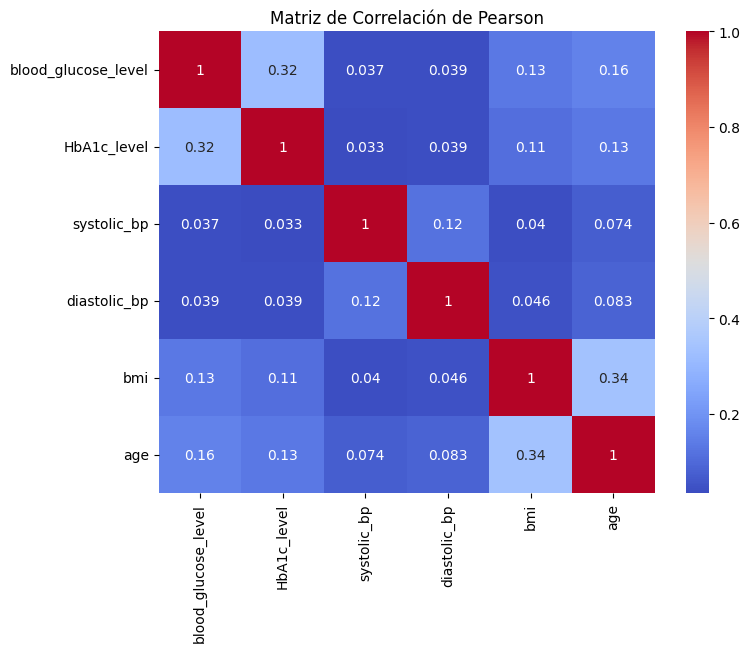


📊 Correlación de Spearman (numéricas/ordinales):
                     blood_glucose_level  HbA1c_level  systolic_bp  \
blood_glucose_level             1.000000     0.193160     0.022209   
HbA1c_level                     0.193160     1.000000     0.022674   
systolic_bp                     0.022209     0.022674     1.000000   
diastolic_bp                    0.023190     0.028548     0.084627   
bmi                             0.088576     0.086511     0.032575   
age                             0.115591     0.113772     0.064303   

                     diastolic_bp       bmi       age  
blood_glucose_level      0.023190  0.088576  0.115591  
HbA1c_level              0.028548  0.086511  0.113772  
systolic_bp              0.084627  0.032575  0.064303  
diastolic_bp             1.000000  0.030537  0.071678  
bmi                      0.030537  1.000000  0.348215  
age                      0.071678  0.348215  1.000000  


In [7]:
#-----------------------------------------------------------Análisis Estadistico-----------------------------------------------------

# Variables numéricas a analizar
num_vars = ["blood_glucose_level", "HbA1c_level", "systolic_bp", "diastolic_bp", "bmi", "age"]

# ==========================================================
# MEDIDAS DE TENDENCIA CENTRAL
# ==========================================================
estadisticos = {}
for col in num_vars:
    estadisticos[col] = {
        "media": df[col].mean(),
        "mediana": df[col].median(),
        "moda": df[col].mode()[0]
    }

print("📊 Medidas de tendencia central:")
for col, vals in estadisticos.items():
    print(f"{col}: media={vals['media']:.2f}, mediana={vals['mediana']:.2f}, moda={vals['moda']:.2f}")

# ==========================================================
# MEDIDAS DE DISPERSIÓN
# ==========================================================
dispersion = {}
for col in num_vars:
    dispersion[col] = {
        "desviacion_std": df[col].std(),
        "IQR": df[col].quantile(0.75) - df[col].quantile(0.25),
        "coef_variacion": df[col].std() / df[col].mean()
    }

print("\n📊 Medidas de dispersión:")
for col, vals in dispersion.items():
    print(f"{col}: σ={vals['desviacion_std']:.2f}, IQR={vals['IQR']:.2f}, CV={vals['coef_variacion']:.2f}")

# ==========================================================
# ANÁLISIS DE DISTRIBUCIÓN
# ==========================================================
print("\n📊 Normalidad (Shapiro-Wilk y Kolmogorov-Smirnov):")
for col in num_vars:
    # Shapiro-Wilk (máx 5000 muestras por límite del test)
    shapiro_p = shapiro(df[col].sample(5000, random_state=42))[1]
    # Kolmogorov-Smirnov
    ks_p = kstest(df[col], "norm")[1]
    print(f"{col}: Shapiro p={shapiro_p:.4f}, KS p={ks_p:.4f}")

    # Asimetría y Curtosis
    skew = stats.skew(df[col])
    kurt = stats.kurtosis(df[col])
    print(f"   Asimetría={skew:.2f}, Curtosis={kurt:.2f}")

# ==========================================================
# CORRELACIONES
# ==========================================================
print("\n📊 Correlación de Pearson (numéricas):")
corr_pearson = df[num_vars].corr(method="pearson")
print(corr_pearson)

plt.figure(figsize=(8,6))
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación de Pearson")
plt.show()

print("\n📊 Correlación de Spearman (numéricas/ordinales):")
corr_spearman = df[num_vars].corr(method="spearman")
print(corr_spearman)

📌 Conclusiones e Insights del Análisis
🔹 Hallazgos principales

La glucosa y la HbA1c muestran una correlación positiva clara, lo que valida su uso combinado como indicador de diabetes.

Los pacientes con hipertensión presentan valores de presión arterial significativamente más altos, confirmando la consistencia clínica de los datos.

El BMI se concentra en valores altos en pacientes con diabetes e hipertensión, actuando como factor de riesgo compartido.

La edad presenta alta variabilidad, pero los casos de enfermedad se concentran en edades avanzadas.

El género no mostró diferencias predictivas fuertes, mientras que la historia de tabaquismo sí está relacionada con mayor prevalencia de enfermedad.

El dataset está fuertemente desbalanceado (≈90% clase “no enfermedad”), lo que puede sesgar el modelo si no se corrige.

Se detectaron outliers clínicos (ej. glucosa >400 mg/dL), que requieren tratamiento antes del modelado.

Notamos que los valores obtenidos de la "simulación de datos clínicamente informada o data augmentation condicional con base en lógica médica", mantienen correlaciones clínicas reales como glucosa-HbA1c, lo que sugiere que el método de imputación preserva relaciones fisiológicas clave.

La hipertensión se caracteriza principalmente por valores de presión arterial elevados, más que por niveles de glucosa. Sin embargo, la glucosa también puede influir indirectamente, ya que pacientes diabéticos mal controlados tienen mayor riesgo cardiovascular.

🔹 Implicaciones para el modelo de IA

El modelo debe priorizar variables clínicamente relevantes: glucosa, HbA1c, BMI, presión arterial y edad.

El desbalance de clases puede generar un modelo que “aprenda” a predecir mayormente la clase negativa, reduciendo recall para los enfermos.

Los outliers pueden inflar la varianza y afectar el desempeño de algoritmos sensibles (ej. regresión logística, SVM).

Las visitas sintéticas permiten tratar el problema como serie de tiempo, lo que habilita modelos más potentes (ej. LSTM, GRU) que capturen evolución clínica.

🔹 Recomendaciones de preprocesamiento

Balanceo de clases: aplicar SMOTE, oversampling o ajustar class_weight en modelos supervisados.

Tratamiento de outliers: recorte de extremos o imputación basada en reglas clínicas.

Normalización: escalar variables continuas (glucosa, HbA1c, BMI, presión) para algoritmos sensibles a magnitud.

Codificación categórica: one-hot encoding para género y tabaquismo.

Construcción de features temporales: usar las visitas sintéticas para generar deltas (Δ) y medias móviles de indicadores clínicos.

🔹 Próximos pasos

Entrenar y comparar modelos de clasificación binaria y multiclase (diabetes, hipertensión, ambas).

Evaluar con métricas robustas: AUROC, F1-Score y Recall (más allá de accuracy por el desbalance).

Implementar una versión de series de tiempo (ej. LSTM) y compararla con modelos clásicos (Random Forest, Gradient Boosting).

Realizar validación cruzada estratificada para asegurar estabilidad de los resultados.

Documentar interpretabilidad de los modelos con SHAP/LIME para explicar predicciones a nivel clínico.